http://seaborn.pydata.org/generated/seaborn.distplot.html#seaborn.distplot

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns

In [4]:
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


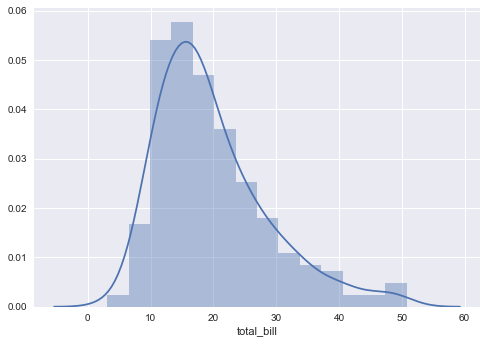

In [3]:
sns.distplot(tips.total_bill)
#sum up to 1

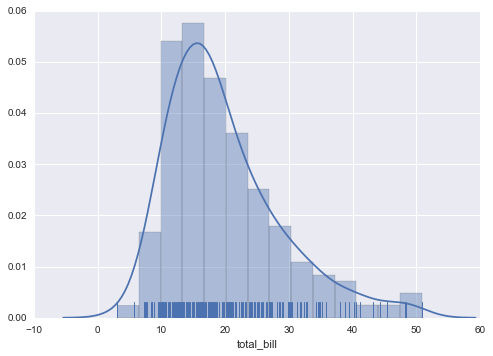

In [6]:
sns.distplot(tips.total_bill, rug=True, hist=True, kde=True)
#rug: draw a small line for each data points in the dataset
#kde: kernel density estimation (KDE) is a non-parametric way to 
#estimate the probability density function of a random variable

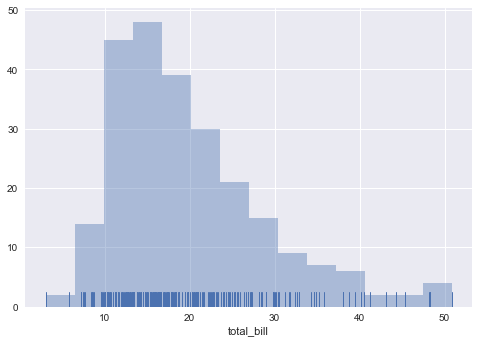

In [7]:
#not norm the hist: count
sns.distplot(tips.total_bill, rug=True, hist=True, kde=False, norm_hist=False)

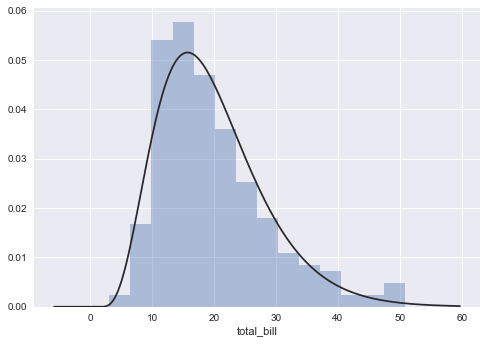

In [11]:
#fit distribution
from scipy import stats
sns.distplot(tips.total_bill, fit=stats.gamme, kde=False)

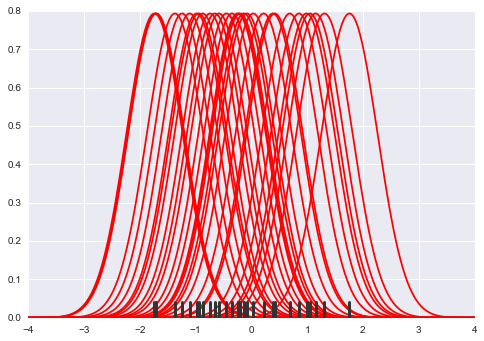

In [9]:
x = np.random.normal(0, 1, size=30)
bandwidth = 1.06 * x.std() * x.size ** (-1 / 5.)
support = np.linspace(-4, 4, 200)

kernels = []
for x_i in x:

    kernel = stats.norm(x_i, bandwidth).pdf(support)
    kernels.append(kernel)
    plt.plot(support, kernel, color="r")

sns.rugplot(x, color=".2", linewidth=3);

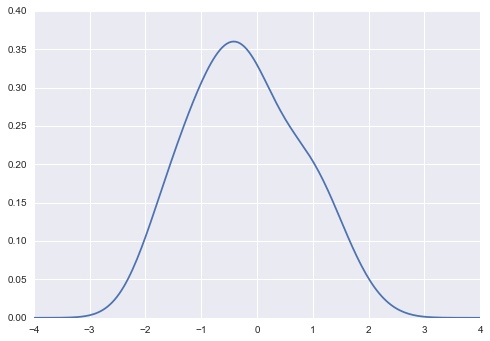

In [10]:
from scipy import integrate

density = np.sum(kernels, axis=0)
density /= integrate.trapz(density, support)
plt.plot(support, density);